---
title: Homework Assignment 6
author: "Amanda & Delphine"
date: 04/04/2025
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
---

\newpage
(1)

See below for References.

(2)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

diabetes = pd.read_csv("https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv")

In [3]:
diabetes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


(1) The classification problem is: 

\newpage

(3)

In [20]:

print(diabetes.dtypes)

print(diabetes.shape)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
(768, 9)


The number of variables is 9, and the number of observations 768. The variable type float is used for BMI and Diabetes Pedigree, and the remaining variables are all integer type. Outcome has either 0 or 1 but these are stored as int64. 

(4)

Text(0.5, 1.0, 'Variances of diabetes features')

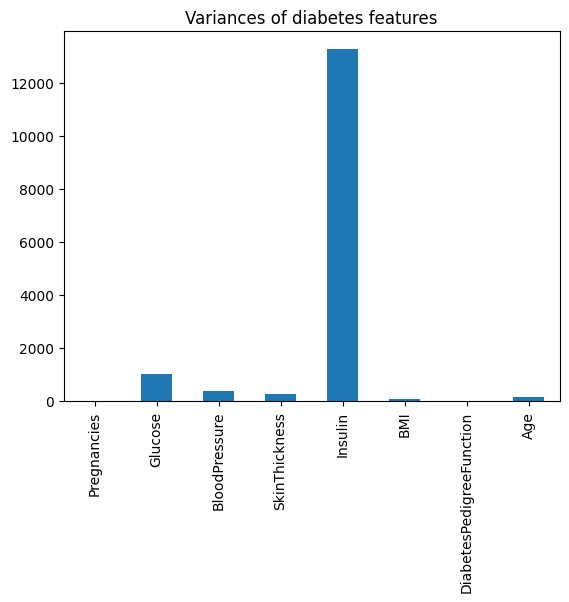

In [21]:
easy_diabetes = diabetes.drop(columns=['Outcome'])

diabetes_variances= easy_diabetes.var()

diabetes_means = easy_diabetes.mean()

diabetes_variances.plot(kind='bar')
plt.title('Variances of diabetes features')

Text(0.5, 1.0, 'Means of diabetes features')

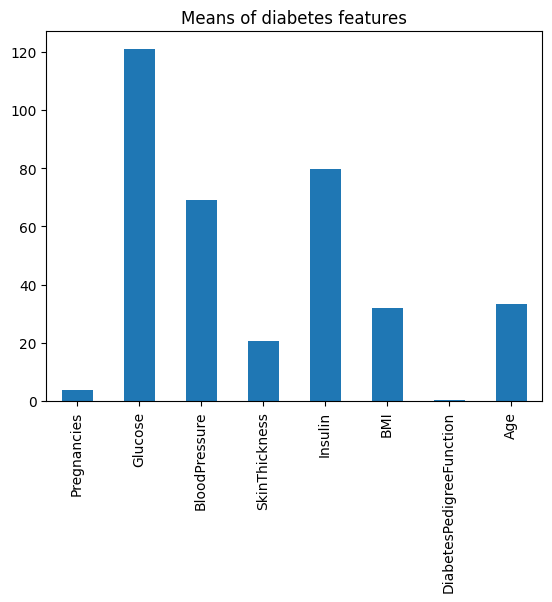

In [22]:
diabetes_means.plot(kind='bar')
plt.title('Means of diabetes features')

Insulin has a larger variance than the other features. 
Glucose has the highest mean of the features. 

(5)

Text(0.5, 1.0, 'Outcome')

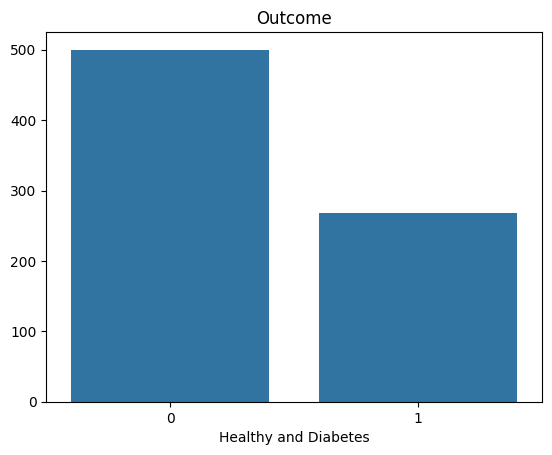

In [23]:
happy = (diabetes['Outcome'] == 0).sum()
sad = (diabetes['Outcome'] == 1).sum()

response = []
response.append(happy)
response.append(sad)

sns.barplot(response)
plt.xlabel("Healthy and Diabetes")
plt.title("Outcome")

More people don't have diabetes than do in the dataset. 

(6)

In [24]:
missing_BMI = (diabetes['BMI'] == 0).sum()
missing_glucose = (diabetes['Glucose'] == 0).sum()
missing_blood_pressure = (diabetes['BloodPressure'] == 0).sum()
missing_insulin = (diabetes['Insulin'] == 0).sum()

print(f"The number of missing values of BMI is {missing_BMI}, for glucose it is {missing_glucose}, for blood pressure it is {missing_blood_pressure}, and for insulin it is {missing_insulin}.")

The number of missing values of BMI is 11, for glucose it is 5, for blood pressure it is 35, and for insulin it is 374.


BMI has 11 missing values, glucose as 5 missing values, blood pressure has 35 missing values, and insulin has 374 missing values. 

(7)

In [27]:
scalerino = StandardScaler()
X = pd.DataFrame(
    scalerino.fit_transform(easy_diabetes), #this variable was used to plot the means(see above graph which had Outcome omitted)
    index=easy_diabetes.index, 
    columns=easy_diabetes.columns
    )


In [28]:
scaler = StandardScaler()
X = pd.get_dummies(X, columns=['Pregnancies'], drop_first=True)
X[['BMI', 'DiabetesPedigreeFunction']] = scaler.fit_transform(X[['BMI', 'DiabetesPedigreeFunction']])

(8)

In [29]:
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y)


y_test

147    0
565    0
390    0
736    0
587    0
      ..
339    1
140    0
463    0
525    0
56     1
Name: Outcome, Length: 192, dtype: int64

(9)

In [30]:
m_log = LogisticRegression(max_iter=120)

(10)

In [38]:
m_log.fit(X_train, y_train)
pred_prob = m_log.predict_proba(X_test)

(11)

In [39]:
m_log_pred = m_log.predict(X_test)
accuracy_score(y_test, m_log_pred) #the default probability cutoff in scikit is 0.5

0.7708333333333334

The model's performance is better than random chance. With 77% accuracy the model does better than flippig a coin. 

(12)

In [ ]:
df_roc = pd.DataFrame(
    data = {'prob1': pred_prob[:,1], 'y_test': y_test}
    )
df_roc.head()

df_roc['y_test_pred'] = df_roc.prob1.map(lambda x: 'Yes' if x>0.5 else 'No')
df_roc.head()

cm = confusion_matrix(df_roc.y_test, df_roc.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) 
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

"df_roc = pd.DataFrame(\n    data = {'prob1': pred_prob[:,1], 'y_test': y_test}\n    )\ndf_roc.head()\n\ndf_roc['y_test_pred'] = df_roc.prob1.map(lambda x: 'Yes' if x>0.5 else 'No')\ndf_roc.head()\n\ncm = confusion_matrix(df_roc.y_test, df_roc.y_test_pred)\nprint('Confusion Matrix : \n', cm)\n\ntotal = sum(sum(cm))\n\naccuracy = (cm[0,0]+cm[1,1])/total\nprint ('Accuracy : ', accuracy)\n\nsensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) \nprint('Sensitivity : ', sensitivity )\n\nspecificity = cm[0,0]/(cm[0,0]+cm[0,1])\nprint('Specificity : ', specificity)"

(13)

Performance could be improved with more data. 

(14)

In [ ]:
df_roc = pd.DataFrame(
    data = {'prob1': pred_prob[:,1], 'y_test': y_test}
    )

df_roc['y_test_pred'] = df_roc.prob1.map(lambda x: 'Yes' if x>0.5 else 'No')


fpr, tpr, thresholds = roc_curve(df_roc.y_test, df_roc.prob1)
roc_auc_score(df_roc.y_test, df_roc.prob1)

plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

"df_roc = pd.DataFrame(\n    data = {'prob1': pred_prob[:,1], 'y_test': y_test}\n    )\n\ndf_roc['y_test_pred'] = df_roc.prob1.map(lambda x: 'Yes' if x>0.5 else 'No')\n\n\nfpr, tpr, thresholds = roc_curve(df_roc.y_test, df_roc.prob1)\nroc_auc_score(df_roc.y_test, df_roc.prob1)\n\nplt.plot(fpr, tpr, marker='.', label='Logistic')\nplt.xlabel('False Positive Rate (1- specificity)')\nplt.ylabel('True Positive Rate (Sensitivity)')\n\nplt.show()"

(15)

In [33]:
ageless_diabetes = diabetes.drop(columns=['Outcome','Age'])

X = ageless_diabetes 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y)

m_log = LogisticRegression(max_iter=120)

m_log.fit(X_train, y_train)
pred_prob = m_log.predict_proba(X_test)
pred_prob

m_log_pred = m_log.predict(X_test)
accuracy_score(y_test, m_log_pred)



0.7708333333333334

(16)

The model's accuracy is 77% with age omitted. We can conclude age does not have a significant affect on diabetes risk. If we remove age from our model, its accuracy does not change much, so knowing someone's age does not make any difference in their chances of diabetes. 

## References

Diabetes Dataset. (n.d.). Retrieved April 2, 2025, from https://www.kaggle.com/datasets/mathchi/diabetes-data-set
